Load the IRIS data using sklearn

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f3757140a50>,
                 k=None, metric=None, model=None, timings=True)

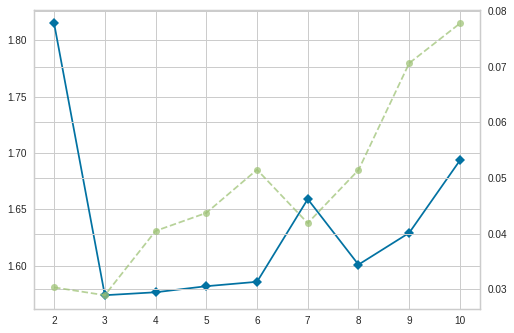

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KElbowVisualizer(KMeans(), k=10)
model.fit(iris.data)
#model.show()

In [ ]:
clusters_k3 = KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=10,random_state=None)
y_kmeans = clusters_k3.fit_predict(iris.data)

In [ ]:
clusters_k3.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [ ]:
clusters_k3.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
!pip install plotnine

In [ ]:
#iris.target = np.where(iris.target==0, 'setosa', iris.target)
#iris.target = np.where(iris.target==1, 'versicolor', iris.target)
#iris.target = np.where(iris.target==2, 'virginica', iris.target)

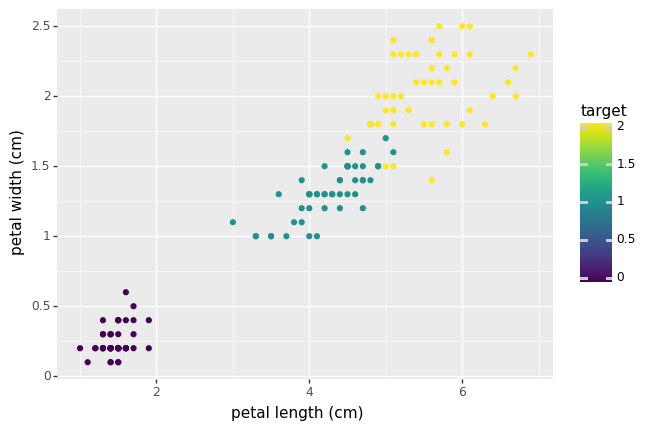

<ggplot: (8742196159657)>

In [ ]:
from plotnine import *
import pandas as pd
import numpy as np

df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
#df = pd.DataFrame(data= iris['data'], columns= iris['feature_names'])
ggplot(data = df) + geom_point(mapping = aes(x = 'petal length (cm)', y = 'petal width (cm)', color = 'target'))

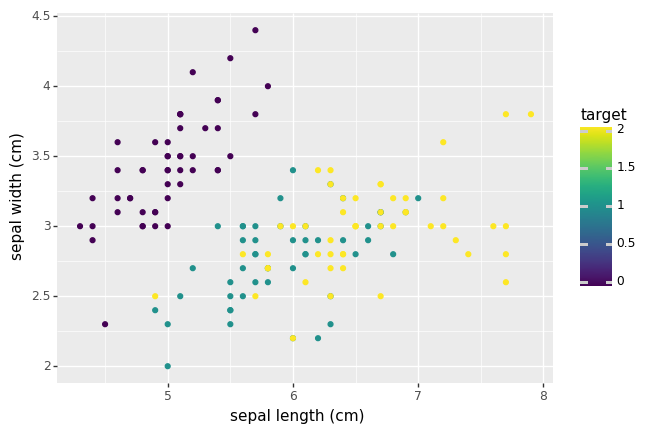

<ggplot: (8742196636029)>

In [ ]:
ggplot(data = df) + geom_point(mapping = aes(x = 'sepal length (cm)', y = 'sepal width (cm)', color = 'target'))

In [ ]:
cluster_centroids = pd.DataFrame(clusters_k3.cluster_centers_,columns= iris['feature_names'])
cluster_centroids

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.428000,1.462000,0.246000
2,6.850000,3.073684,5.742105,2.071053


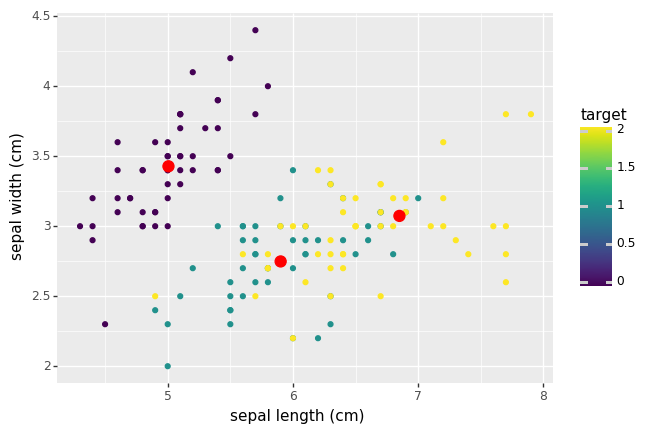

<ggplot: (8742196234993)>

In [ ]:
ggplot(data = None) + geom_point(data = df, mapping = aes(x = 'sepal length (cm)', y = 'sepal width (cm)', color = 'target')) + geom_point(data = cluster_centroids, mapping = aes(x = 'sepal length (cm)', y = 'sepal width (cm)'), color = "red", size = 4)

# Data pre-processing

In [ ]:
#Download the churn file shared from Google Drive

!pip install gdown
!gdown --id 12pxQ9u56ObcHIERMhgnegVyjLMOfLmQZ

Downloading...
From: https://drive.google.com/uc?id=12pxQ9u56ObcHIERMhgnegVyjLMOfLmQZ
To: /content/churn.csv
100% 978k/978k [00:00<00:00, 62.0MB/s]


In [ ]:
import pandas as pd
churn = pd.read_csv('./churn.csv')
print(churn.head())
print(churn['tenure']) 


   customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0  7590-VHVEG  Female              0  ...          29.85        29.85     No
1  5575-GNVDE    Male              0  ...          56.95       1889.5     No
2  3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3  7795-CFOCW    Male              0  ...          42.30      1840.75     No
4  9237-HQITU  Female              0  ...          70.70       151.65    Yes

[5 rows x 21 columns]
0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64


Applying Min-Max scaling on tenure feature

In [ ]:
#Delete rows with empty TotalCharges
emptyRows = churn[churn['TotalCharges'].str.match(' ')].index
emptyRows
churn = churn.drop(emptyRows)
churn.shape

(7032, 21)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
churn[['tenure']] = min_max_scaler.fit_transform(churn[['tenure']])
churn[['MonthlyCharges']] = min_max_scaler.fit_transform(churn[['MonthlyCharges']])
churn[['TotalCharges']] = min_max_scaler.fit_transform(churn[['TotalCharges']])
print(churn['tenure']) 

0       0.000000
1       0.464789
2       0.014085
3       0.619718
4       0.014085
          ...   
7038    0.323944
7039    1.000000
7040    0.140845
7041    0.042254
7042    0.915493
Name: tenure, Length: 7032, dtype: float64


Delete the customerID feature to remove randomness

In [ ]:
del churn['customerID']
churn.head()

Split dataset into Train and Test

In [ ]:
from sklearn.model_selection import train_test_split
trainset , testset   = train_test_split(churn, train_size=0.8, random_state=1)

In [ ]:
#trainset.iloc[: , :19].shape
trainset.iloc[:,-1:].shape

(5634, 1)

# Decision Tree

In [ ]:
from sklearn import tree , preprocessing
from matplotlib import pyplot as plt
le = preprocessing.LabelEncoder()
trainsetEncoded = trainset.apply(le.fit_transform)

clf = tree.DecisionTreeClassifier(max_depth=3,random_state=0)
features = trainsetEncoded.iloc[: , :19]
target = trainsetEncoded.iloc[:,-1:]
clf = clf.fit(features, target )


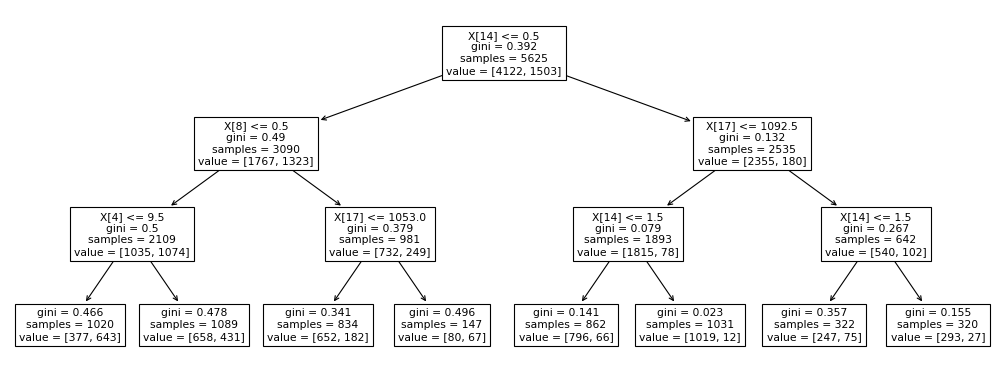

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(16, 6), dpi=80)
tree.plot_tree(clf)
plt.show()

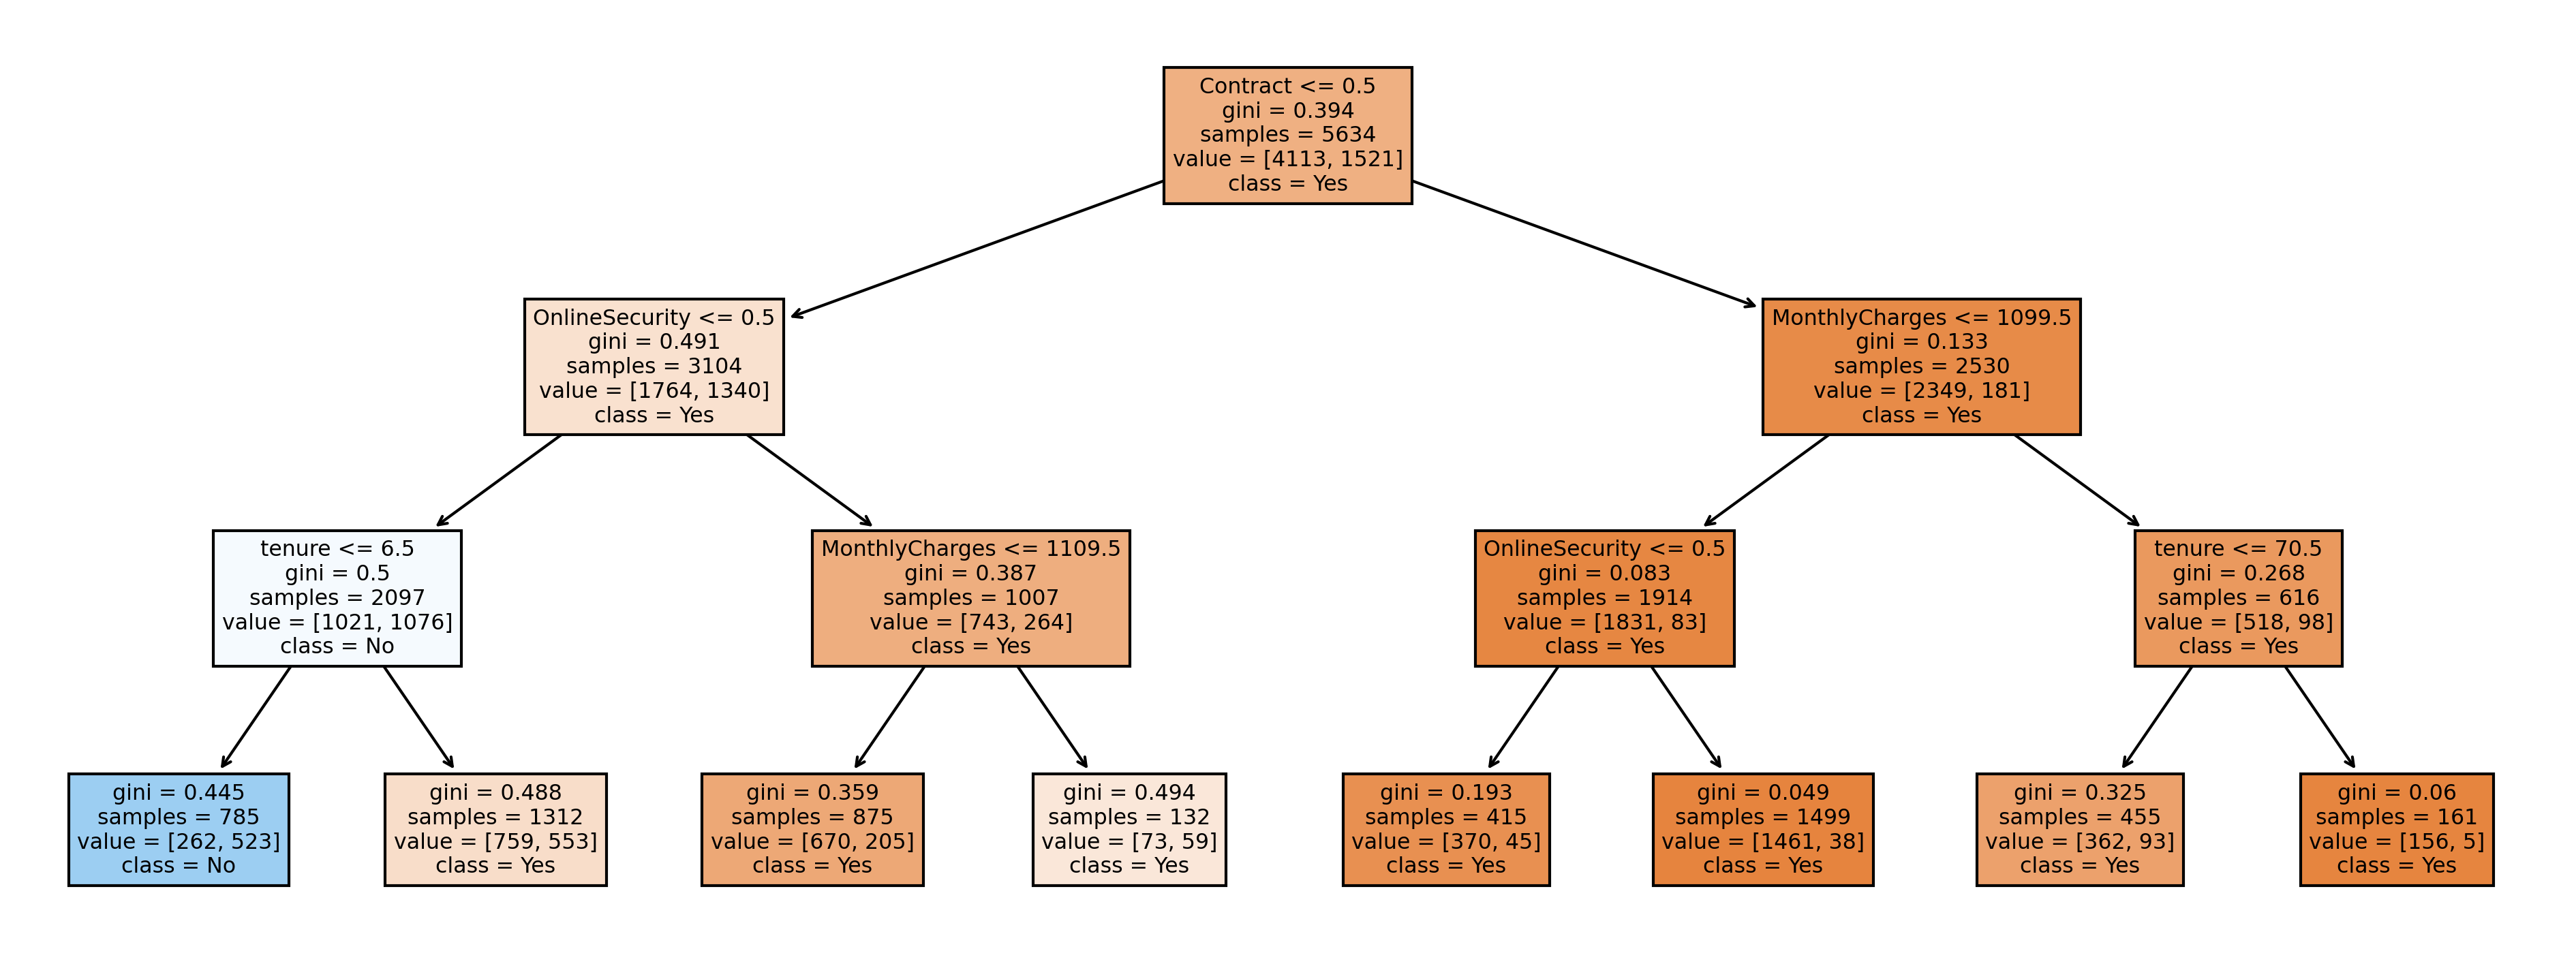

In [ ]:
fn=list(features.columns.values)
cn=['Yes','No']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (16,6), dpi=300)
tree.plot_tree(clf, feature_names = fn, class_names=cn, filled = True);

In [ ]:
tree.export_graphviz(clf,
                     out_file="tree.dot",
                     feature_names = fn, 
                     class_names=cn,
                     filled = True)

In [ ]:
!dot -Tpng -Gdpi=300 tree.dot -o tree.png

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.18589 to fit


Prediction

In [ ]:
le = preprocessing.LabelEncoder()
testsetEncoded = testset.apply(le.fit_transform)
testFeatures = testsetEncoded.iloc[: , :19]
testTarget = testsetEncoded.iloc[: , -1:]
testTarget.iloc[3]

Churn    0
Name: 1665, dtype: int64

In [ ]:
#predicted= clf.predict([testFeatures.iloc[3]]) #Only third row prediction
predicted= clf.predict(testFeatures) #All rows prediction
print(predicted)

[0 0 0 ... 0 0 0]


Confusion Matrix

<Figure size 1280x480 with 0 Axes>

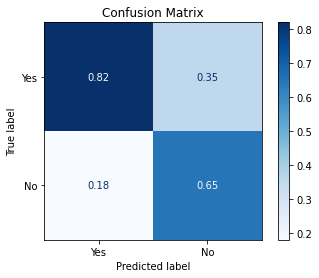

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
figure(figsize=(16, 6), dpi=80)
plot_confusion_matrix(clf, testFeatures, testTarget,display_labels=cn,normalize='pred', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


Calculate Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
accScore = accuracy_score(testTarget, predicted)
accScore

0.7903340440653873

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFModel = RandomForestClassifier(n_estimators=500, max_features=5, max_depth=4, random_state=0)
RFModel = RFModel.fit(features, target)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
RFpredicted= RFModel.predict(testFeatures) #All rows prediction
print(RFpredicted)

[0 0 0 ... 0 0 0]


<Figure size 1280x480 with 0 Axes>

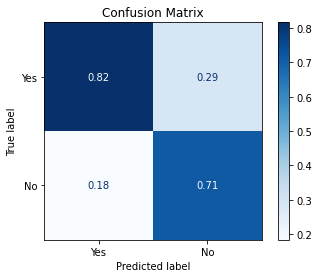

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
figure(figsize=(16, 6), dpi=80)
plot_confusion_matrix(RFModel, testFeatures, testTarget,display_labels=cn,normalize='pred', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score
accScore = accuracy_score(testTarget, RFpredicted)
accScore

0.8017057569296375

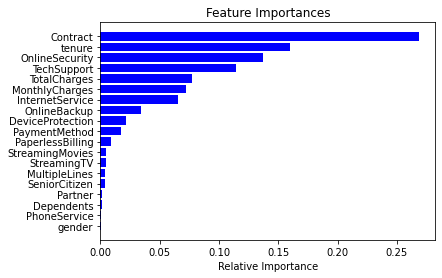

In [ ]:
import numpy as np
importances = RFModel.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [fn[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Support Vector Machine

In [ ]:
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
SvmModel = svm.SVC(kernel='rbf',gamma='scale',C=0.1)
#SvmModel = make_pipeline(StandardScaler(), SVC(gamma='auto'))
SvmModel = SvmModel.fit(features,target)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
SVMpredicted= SvmModel.predict(testFeatures) #All rows prediction
print(SVMpredicted)

[0 1 0 ... 0 0 0]


<Figure size 1280x480 with 0 Axes>

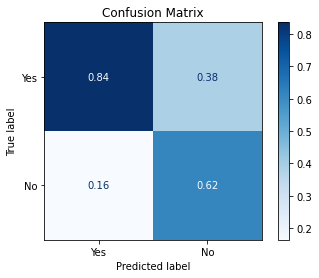

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
figure(figsize=(16, 6), dpi=80)
plot_confusion_matrix(SvmModel, testFeatures, testTarget,display_labels=cn,normalize='pred', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score
accScore = accuracy_score(testTarget, SVMpredicted)
accScore

0.7874911158493249

In [ ]:
SvmModel.n_support_

array([1479, 1230], dtype=int32)